In [134]:
import pandas as pd
import os
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from pprint import pprint
from tqdm import tqdm

In [7]:
os.listdir('./원본 DATA/')

['1.병원정보서비스 2022.6.csv',
 '건강보험심사평가원_요양기관 개설 현황_20211231.csv',
 '건강보험심사평가원_전국 병의원 및 약국 현황_20220630',
 '경상남도 김해시_인구 및 세대 현황_20220731.csv',
 '경상남도_의료기관 현황_20211019.csv',
 '응급의료기관.csv',
 '의료기관',
 '의료기관종사_의료인력_20220920172158.csv',
 '지역화폐',
 '한국행정구역분류_행정동코드(7자리)21년.csv',
 '한국행정구역분류_행정동코드(7자리)_20210701기준.xlsx']

In [8]:
원본 = './원본 DATA/'
전처리 = './전처리/의료기관/'

In [58]:
의료기관_폐업 = pd.read_csv(전처리 + '의료기관_폐업.csv', encoding='cp949')

In [59]:
의료기관_폐업.drop('Unnamed: 0', axis=1, inplace=True)

In [60]:
의료기관_폐업.head()

개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호       인허가일자  \
0     의원  01_01_02_P   5350000  PHMA120115350029041100010  2011-05-09   
1     의원  01_01_02_P   5350000  PHMA119735350029041100001  1973-06-11   
2     의원  01_01_02_P   5350000  PHMA119985350029041100023  1998-02-04   
3     의원  01_01_02_P   5350000  PHMA119655350029041100001  1965-12-04   
4     의원  01_01_02_P   5350000  PHMA119995350029041100016  1999-03-05   

   인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드 상세영업상태명  ...  \
0      NaN         3    폐업         3      폐업  ...   
1      NaN         3    폐업         3      폐업  ...   
2      NaN         3    폐업         3      폐업  ...   
3      NaN         3    폐업         3      폐업  ...   
4      NaN         3    폐업         3      폐업  ...   

                                   진료과목내용명  지정취소일자  완화의료지정형태  완화의료담당부서명 구급차특수  \
0  내과, 외과, 정형외과, 소아청소년과, 이비인후과, 피부과, 가정의학과     NaN       NaN        NaN     0   
1                               내과, 소아청소년과     NaN       NaN        NaN     0   
2                        내과, 소아청소년과, 이비인후과     NaN       NaN        NaN     0   
3                             정형외과, 소아청소년과     NaN       NaN        NaN     0   
4                            소아청소년과, 이비인후과     NaN       NaN        NaN     0   

   구급차일반  총인원 구조사수 허가병상수  최초지정일자  
0      0  NaN  NaN     0     NaN  
1      0  NaN  NaN     0     NaN  
2      0  NaN  NaN     0     NaN  
3      0  NaN  NaN     0     NaN  
4      0  NaN  NaN     0     NaN  

[5 rows x 43 columns]

In [61]:
의료기관_폐업.columns

Index(['개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자'],
      dtype='object')

In [62]:
의료인수 = 의료기관_폐업[['사업장명', '의료인수']]

In [63]:
의료인수

사업장명  의료인수
0                 생림의원     1
1                이무수의원     1
2             이영록소아과의원     1
3                 동산의원     1
4            연세이비인후과의원     1
..                 ...   ...
322             아름여성병원    19
323           실버캐슬요양병원    20
324    의료법인현담의료재단 현대병원    21
325  의료법인건생당의료재단진영한서병원    22
326             김해자성병원    28

[327 rows x 2 columns]

In [64]:
의료인수['의료인수'].value_counts().sort_index()

1     247
2      30
3       8
4       8
5      11
6       4
7       3
8       1
9       3
14      1
15      1
16      2
17      2
18      1
19      1
20      1
21      1
22      1
28      1
Name: 의료인수, dtype: int64

In [76]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [66]:
의료인수_df = pd.DataFrame(df_c6)

In [67]:
의료인수_df.reset_index(inplace=True)

In [68]:
의료인수_df.rename(columns={'index':'의료진수', '의료인수':'병원수'}, inplace=True) 

In [69]:
의료인수_df

의료진수  병원수
0      1  247
1      2   30
2      3    8
3      4    8
4      5   11
5      6    4
6      7    3
7      8    1
8      9    3
9     14    1
10    15    1
11    16    2
12    17    2
13    18    1
14    19    1
15    20    1
16    21    1
17    22    1
18    28    1

In [76]:
의료인수_5이상 = pd.DataFrame(의료인수_df[의료인수_df['의료진수'] > 4].sum())

In [80]:
의료인수_5이상 = 의료인수_5이상.T

In [81]:
의료인수_5이상

의료진수  병원수
0   225   34

In [84]:
의료인수_df = 의료인수_df[의료인수_df['의료진수']<5]

In [85]:
의료인수_df

의료진수  병원수
0     1  247
1     2   30
2     3    8
3     4    8

In [86]:
의료인수_df = pd.concat([의료인수_df, 의료인수_5이상])

In [88]:
의료인수_df.reset_index(drop=True, inplace=True)

In [89]:
의료인수_df

의료진수  병원수
0     1  247
1     2   30
2     3    8
3     4    8
4   225   34

In [91]:
for n in range(len(의료인수_df)):
    의료인수_df['의료진수'][n] = str(의료인수_df['의료진수'][n]) + '명'

In [92]:
의료인수_df

의료진수  병원수
0    1명  247
1    2명   30
2    3명    8
3    4명    8
4  225명   34

In [93]:
의료인수_df['의료진수'][4] = '5명 이상'

In [94]:
의료인수_df

의료진수  병원수
0     1명  247
1     2명   30
2     3명    8
3     4명    8
4  5명 이상   34

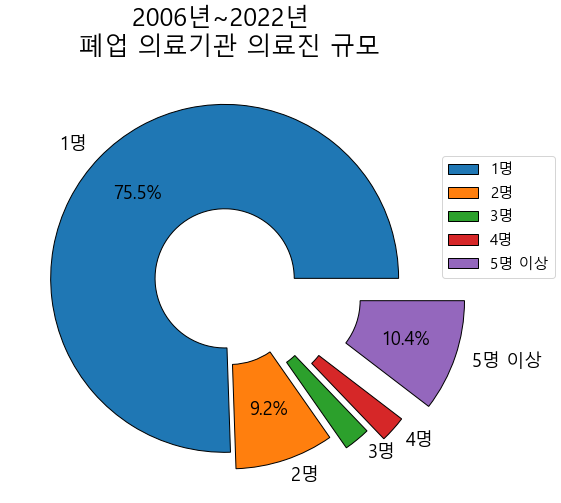

In [169]:
def customPct(pct) :
    return ('%.1f%%' % pct) if pct >= 8 else ''


f, ax = plt.subplots(figsize=(8, 8))
plt.rc('font', size=15)
plt.title('2006년~2022년 \n 폐업 의료기관 의료진 규모', size = 25)
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(의료인수_df['병원수'], 
        labels = 의료인수_df['의료진수'], 
        autopct=customPct,
        explode=[0, 0.1, 0.2, 0.3, 0.4],
        wedgeprops = wedgeprops, 
        pctdistance=0.7,
        textprops={'size': 18})
plt.legend(loc = (1, 0.5))
plt.show()

In [149]:
list(의료인수_df['의료진수'])

['1명', '2명', '3명', '4명', '5명 이상']

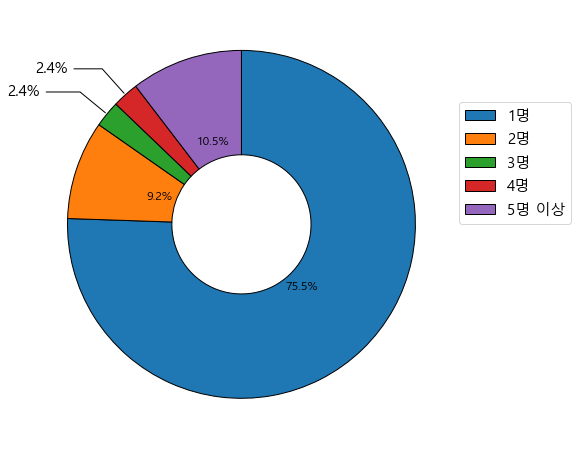

In [168]:
labels = list(의료인수_df['의료진수']) ## 라벨
frequency = list(의료인수_df['병원수']) ## 빈도
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}


fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
             startangle=90, ## 시작점을 90도(degree)로 지정
             counterclock=False, ## 시계방향으로 그려짐
             wedgeprops = wedgeprops,
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
 
## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.1f}')
        text = f'{frequency[i]/total*100:.1f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.1f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)
    
plt.legend(pie[0],labels,loc = (1, 0.5)) ## 범례
plt.show()


In [170]:
os.listdir('./전처리')

['김해 법정동.csv',
 '김해_행정_법정동.csv',
 '김해시 의료기관 병상.csv',
 '김해시 의료기관(약국 제외).csv',
 '김해시 의료기관.csv',
 '병원정보.csv',
 '응급센터.csv',
 '의료기관',
 '지역화폐']

# 의료기관 년도 확인

In [374]:
의료기관 = pd.read_csv(전처리 + '의료기관.csv', encoding='cp949')

In [375]:
의료기관.drop('Unnamed: 0', axis=1, inplace=True)

In [376]:
의료기관.head(1)

개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호       인허가일자  \
0     의원  01_01_02_P   5350000  PHMA120055350029041100010  2005-03-29   

   인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드 상세영업상태명  ...  \
0      NaN         3    폐업         3      폐업  ...   

                         진료과목내용명 지정취소일자 완화의료지정형태  완화의료담당부서명 구급차특수  구급차일반  총인원  \
0  내과, 소아청소년과, 이비인후과, 피부과, 가정의학과    NaN      NaN        NaN     0      0  NaN   

  구조사수 허가병상수  최초지정일자  
0  NaN     0     NaN  

[1 rows x 43 columns]

In [377]:
의료기관.columns

Index(['개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자'],
      dtype='object')

In [378]:
import math

In [379]:
의료기관['폐업일자'][5]

'2008-10-13'

In [380]:
type(의료기관['폐업일자'][1]) == str

True

In [381]:
type(의료기관['폐업일자'][860]) == str

False

In [382]:
math.isnan(의료기관['폐업일자'][860])

True

In [383]:
의료기관['인허가 년도'] = None
의료기관['폐업 년도'] = None

for n in range(len(의료기관)):
    인허가 = int(의료기관['인허가일자'][n].split('-')[0])
    
    if type(의료기관['폐업일자'][n]) == str:
        폐업 = int(의료기관['폐업일자'][n].split('-')[0])
    else:
        폐업 = np.nan
    
    의료기관['인허가 년도'][n] = 인허가
    의료기관['폐업 년도'][n] =  폐업

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9964\686706451.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의료기관['인허가 년도'][n] = 인허가
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9964\686706451.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의료기관['폐업 년도'][n] =  폐업


In [384]:
의료기관.head()

개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호       인허가일자  \
0     의원  01_01_02_P   5350000  PHMA120055350029041100010  2005-03-29   
1     병원  01_01_01_P   5350000  PHMA220095350029021200003  2009-07-02   
2     병원  01_01_01_P   5350000  PHMA220075350029021200002  2007-01-10   
3     의원  01_01_02_P   5350000  PHMA120025350029041100043  2002-11-07   
4     의원  01_01_02_P   5350000  PHMA120065350029041100009  2006-03-29   

   인허가취소일자  영업상태구분코드           영업상태명  상세영업상태코드 상세영업상태명  ... 완화의료지정형태  \
0      NaN         3              폐업         3      폐업  ...      NaN   
1      NaN         4  취소/말소/만료/정지/중지        24    직권폐업  ...      NaN   
2      NaN         3              폐업         3      폐업  ...      NaN   
3      NaN         3              폐업         3      폐업  ...      NaN   
4      NaN         3              폐업         3      폐업  ...      NaN   

  완화의료담당부서명 구급차특수  구급차일반 총인원  구조사수  허가병상수 최초지정일자 인허가 년도  폐업 년도  
0       NaN     0      0 NaN   NaN      0    NaN   2005   2010  
1       NaN     0      0 NaN   NaN      0    NaN   2009   2009  
2       NaN     0      0 NaN   NaN      0    NaN   2007   2012  
3       NaN     0      0 NaN   NaN      0    NaN   2002   2012  
4       NaN     0      0 NaN   NaN      0    NaN   2006   2008  

[5 rows x 45 columns]

In [385]:
의료기관.to_csv(전처리+'년도별정리.csv', encoding='cp949')

In [296]:
의료기관.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   개방서비스명     890 non-null    object 
 1   개방서비스아이디   890 non-null    object 
 2   개방자치단체코드   890 non-null    int64  
 3   관리번호       890 non-null    object 
 4   인허가일자      890 non-null    object 
 5   인허가취소일자    0 non-null      float64
 6   영업상태구분코드   890 non-null    int64  
 7   영업상태명      890 non-null    object 
 8   상세영업상태코드   890 non-null    int64  
 9   상세영업상태명    890 non-null    object 
 10  폐업일자       327 non-null    object 
 11  휴업시작일자     9 non-null      object 
 12  휴업종료일자     9 non-null      object 
 13  재개업일자      0 non-null      float64
 14  소재지전화      880 non-null    object 
 15  소재지면적      0 non-null      float64
 16  소재지우편번호    315 non-null    float64
 17  소재지전체주소    820 non-null    object 
 18  도로명전체주소    886 non-null    object 
 19  도로명우편번호    699 non-null    float64
 20  사업장명      

In [297]:
년도별정리 = 의료기관[['인허가 년도', '폐업 년도']]

In [303]:
년도별정리.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   인허가 년도  890 non-null    object
 1   폐업 년도   327 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [314]:
년도별정리

인허가 년도 폐업 년도
0     2005  2010
1     2009  2009
2     2007  2012
3     2002  2012
4     2006  2008
..     ...   ...
885   1993  2010
886   1965  2006
887   1968  2007
888   1973  2006
889   1994  2008

[890 rows x 2 columns]

In [313]:
년도별정리[년도별정리['폐업 년도'].isnull()]

인허가 년도 폐업 년도
17    1989  None
18    2009  None
19    2001  None
20    1996  None
21    2017  None
..     ...   ...
879   1999  None
880   1991  None
881   2004  None
882   2004  None
883   2005  None

[563 rows x 2 columns]

In [251]:
년도 = {'2006년':None, '2007년':None, '2008년':None, '2009년':None, '2010년':None,
        '2011년':None, '2012년':None, '2013년':None, '2014년':None, '2015년':None,
        '2016년':None, '2017년':None, '2018년':None, '2019년':None, '2020년':None,
        '2021년':None, '2022년':None}

In [321]:
년도_list = []
for n in range(17):
    년도_list.append(2006 + n)

In [323]:
print(년도_list)

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [352]:
a = 년도별정리[(년도별정리['인허가 년도'] < 2023) & 
               ((년도별정리['폐업 년도'] > 2022) | (년도별정리['폐업 년도'].isnull()))]
len(a)

563

In [350]:
a = 년도별정리[(년도별정리['인허가 년도'] < 2023) & 
               ((년도별정리['폐업 년도'] >= 2022) | (년도별정리['폐업 년도'].isnull()))]

In [351]:
a.to_csv('뭐지.csv', encoding='cp949')

In [368]:
for n in 년도_list:
    a = 년도별정리[(년도별정리['인허가 년도'] < n+1) & 
               ((년도별정리['폐업 년도'] >= n) | (년도별정리['폐업 년도'].isnull()))]
    년도[str(n)+'년'] = len(a)
    
# 해당 년도에 폐업한 곳도 일단은 그 년도에 있었긴하므로 포함시킴

In [369]:
년도

{'2006년': 410,
 '2007년': 455,
 '2008년': 470,
 '2009년': 483,
 '2010년': 491,
 '2011년': 491,
 '2012년': 506,
 '2013년': 513,
 '2014년': 520,
 '2015년': 521,
 '2016년': 536,
 '2017년': 543,
 '2018년': 548,
 '2019년': 555,
 '2020년': 557,
 '2021년': 575,
 '2022년': 571}

In [370]:
년도별_병원수 = pd.Series(년도)

In [371]:
년도별_병원수

2006년    410
2007년    455
2008년    470
2009년    483
2010년    491
2011년    491
2012년    506
2013년    513
2014년    520
2015년    521
2016년    536
2017년    543
2018년    548
2019년    555
2020년    557
2021년    575
2022년    571
dtype: int64

In [373]:
년도별_병원수.to_csv(전처리+'년도별_병원수.csv', encoding='cp949')

<AxesSubplot:title={'center':'년도별 의료기관 수'}>

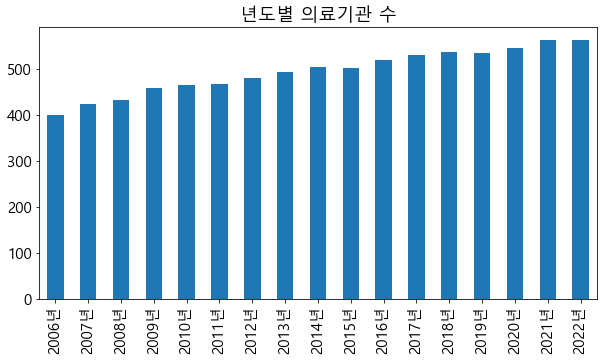

In [367]:
f, ax = plt.subplots(figsize=(10, 5))
plt.rc('font', size=15)
plt.title('년도별 의료기관 수')
년도별_병원수.plot.bar()

<AxesSubplot:title={'center':'년도별 의료기관 수'}>

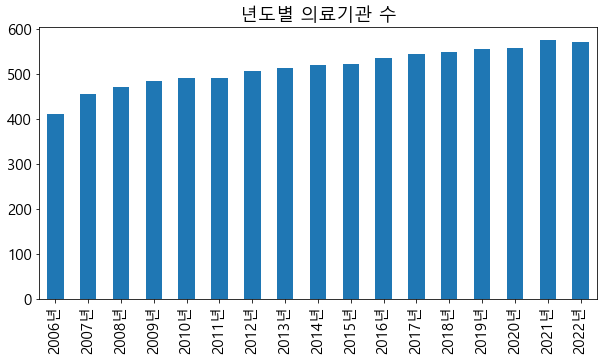

In [372]:
f, ax = plt.subplots(figsize=(10, 5))
plt.rc('font', size=15)
plt.title('년도별 의료기관 수')
년도별_병원수.plot.bar()

In [13]:
인구 = pd.read_csv(원본 + '경상남도 김해시_인구 및 세대 현황_20220731.csv', encoding='cp949')

In [14]:
인구.head()

행정동  인구수_계  인구수_남  인구수_여  18세 이하_계  18세 이하_남  18세 이하_여  19세 이상 39세 이하_계  \
0  진영읍  55281  28376  26905     11593      5973      5620            13118   
1  주촌면  18751   9660   9091      4098      2077      2021             5934   
2  진례면   6244   3437   2807       431       238       193             1016   
3  한림면   7145   3893   3252       383       206       177             1055   
4  생림면   3738   2010   1728       155        91        64              512   

   19세 이상 39세 이하_남  19세 이상 39세 이하_여  65세 이상_계  65세 이상_남자  65세 이상_여자    세대수  \
0             6959             6159      7014       3090       3924  24102   
1             3062             2872      1487        728        759   7434   
2              638              378      1901        861       1040   3489   
3              656              399      2564       1156       1408   4081   
4              319              193      1395        644        751   2213   

   재외국민     데이터기준일자  
0    19  2022-07-31  
1     7  2022-07-31  
2    13  2022-07-31  
3     2  2022-07-31  
4     2  2022-07-31

In [15]:
인구 = 인구[['행정동', '인구수_계','65세 이상_계']]

In [16]:
인구.head()

행정동  인구수_계  65세 이상_계
0  진영읍  55281      7014
1  주촌면  18751      1487
2  진례면   6244      1901
3  한림면   7145      2564
4  생림면   3738      1395

In [17]:
인구.rename(columns={'인구수_계': '인구수', '65세 이상_계':'노인수'}, inplace=True)

In [41]:
인구 = 인구.sort_values('행정동')

In [42]:
인구.reset_index(drop=True, inplace=True)

In [43]:
인구.head()

행정동    인구수   노인수
0  내외동  73100  8378
1  대동면   5531  2258
2  동상동   9488  1828
3  부원동   9651  1770
4  북부동  82172  8315

In [51]:
의료진 = pd.read_csv('./전처리/동별_의료진수.csv', encoding='cp949') 

In [52]:
의료진 = 의료진[['EMD_NM','의료진수']]

In [53]:
의료진.rename(columns={'EMD_NM': '의_행정동'}, inplace=True)

In [55]:
의료진 = 의료진.sort_values('의_행정동')

In [56]:
의료진.reset_index(drop=True, inplace=True)

In [57]:
의료진.head()

의_행정동  의료진수
0   내외동   635
1   대동면     4
2   동상동     1
3   부원동   199
4   북부동   424

In [91]:
의료진 = pd.read_csv('./전처리/내과류_의료진.csv', encoding='cp949') 

In [93]:
의료진 = 의료진[['EMD_NM','의료진수']]
의료진.rename(columns={'EMD_NM': '의_행정동'}, inplace=True)
의료진 = 의료진.sort_values('의_행정동')
의료진.reset_index(drop=True, inplace=True)
의료진.head()

의_행정동  의료진수
0   내외동   542
1   대동면     4
2   동상동     1
3   부원동   160
4   북부동   351

In [94]:
동별_인구_의료진 = pd.concat([인구, 의료진],axis=1)

In [95]:
동별_인구_의료진.drop('의_행정동', axis=1, inplace=True)

In [96]:
동별_인구_의료진.head()

행정동    인구수   노인수  의료진수
0  내외동  73100  8378   542
1  대동면   5531  2258     4
2  동상동   9488  1828     1
3  부원동   9651  1770   160
4  북부동  82172  8315   351

In [97]:
동별_인구_의료진['의료진 1인당 담당 인구'] = 동별_인구_의료진['인구수'] / 동별_인구_의료진['의료진수']

In [98]:
동별_인구_의료진['의료진 1인당 담당 노인층 수'] = 동별_인구_의료진['노인수'] / 동별_인구_의료진['의료진수']

In [99]:
동별_인구_의료진

행정동    인구수   노인수  의료진수  의료진 1인당 담당 인구  의료진 1인당 담당 노인층 수
0     내외동  73100  8378   542     134.870849         15.457565
1     대동면   5531  2258     4    1382.750000        564.500000
2     동상동   9488  1828     1    9488.000000       1828.000000
3     부원동   9651  1770   160      60.318750         11.062500
4     북부동  82172  8315   351     234.108262         23.689459
5     불암동   7268  1206    17     427.529412         70.941176
6     삼안동  31962  4999    13    2458.615385        384.538462
7     상동면   3114   994     9     346.000000        110.444444
8     생림면   3738  1395    10     373.800000        139.500000
9    장유1동  56134  5767   174     322.609195         33.143678
10   장유2동  36034  3512   213     169.173709         16.488263
11   장유3동  73257  4994    97     755.226804         51.484536
12    주촌면  18751  1487    16    1171.937500         92.937500
13    진례면   6244  1901    25     249.760000         76.040000
14    진영읍  55281  7014   158     349.879747         44.392405
15  칠산서부동   9353  1941    57     164.087719         34.052632
16    한림면   7145  2564     4    1786.250000        641.000000
17    활천동  39040  5713   316     123.544304         18.079114
18    회현동   8802  2015    63     139.714286         31.984127

In [100]:
담당인구 = 동별_인구_의료진[['행정동','의료진 1인당 담당 인구']]

In [101]:
담당인구.set_index('행정동', inplace=True)

<AxesSubplot:title={'center':'내과 의료진 1인당 담당 인구'}, xlabel='행정동'>

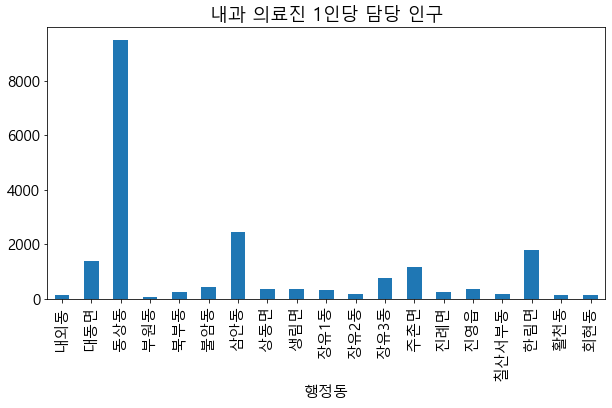

In [106]:
f, ax = plt.subplots(figsize=(10, 5))
plt.rc('font', size=15)
plt.title('내과 의료진 1인당 담당 인구')
담당인구['의료진 1인당 담당 인구'].plot.bar()

In [103]:
담당노인 = 동별_인구_의료진[['행정동','의료진 1인당 담당 노인층 수']]

In [104]:
담당노인.set_index('행정동', inplace=True)

<AxesSubplot:title={'center':'내과 의료진 1인당 담당 노인층 수'}, xlabel='행정동'>

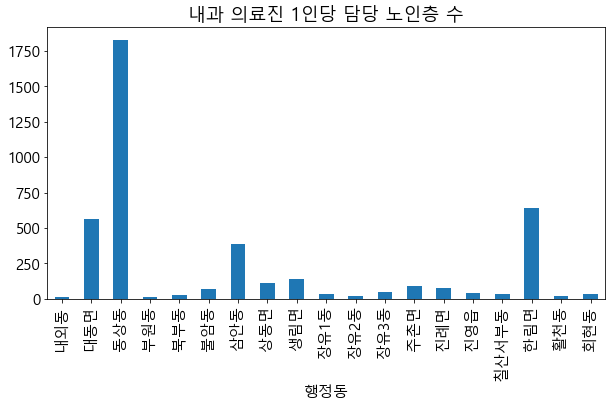

In [107]:
f, ax = plt.subplots(figsize=(10, 5))
plt.rc('font', size=15)
plt.title('내과 의료진 1인당 담당 노인층 수')
담당노인['의료진 1인당 담당 노인층 수'].plot.bar()

In [114]:
의료기관 = pd.read_csv(전처리 + '의료기관.csv', encoding='cp949')

In [116]:
의료기관.drop('Unnamed: 0', axis=1, inplace=True)

In [118]:
의료기관.columns

Index(['개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자'],
      dtype='object')

In [131]:
addr = 의료기관['도로명전체주소'][150]
addr = addr.split()


for i in addr:
    if '로' in i or '길' in i:
        addr = addr[:addr.index(i) + 2]
        break
addr = " ".join(addr)


if addr == '경상남도 김해시 주촌면 소망길 263':
    addr = '경남 김해시 주촌면 이지산단로 155'

url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
headers = {"Authorization": "KakaoAK 073a393656181c6073880062d3507191"}
result = json.loads(str(requests.get(url, headers=headers).text))
match_first = result['documents'][0]['address']
행 = match_first['region_3depth_h_name']
법 = match_first['region_3depth_name']
pprint(match_first)
# 의료기관['행정동'][n] = 행
# 의료기관['법정동'][n] = 법

{'address_name': '경남 김해시 관동동 451-4',
 'b_code': '4825013000',
 'h_code': '4825063000',
 'main_address_no': '451',
 'mountain_yn': 'N',
 'region_1depth_name': '경남',
 'region_2depth_name': '김해시',
 'region_3depth_h_name': '장유3동',
 'region_3depth_name': '관동동',
 'sub_address_no': '4',
 'x': '128.795710119536',
 'y': '35.1775554608468'}


In [157]:
의료기관['행정동'] = 0
의료기관['법정동'] = 0

for n in tqdm(range(len(의료기관))):
    addr = 의료기관['도로명전체주소'][n]
    addr = addr.split()


    for i in addr:
        if '로' in i or '길' in i:
            addr = addr[:addr.index(i) + 2]
            break
    addr = " ".join(addr)


    if addr == '경상남도 김해시 주촌면 소망길 263':
        addr = '경남 김해시 주촌면 이지산단로 155'
        
    elif addr == '경상남도 김해시 계동로23번길 17-14,':
        addr ='경남 김해시 계동로23번길 19-14'
        
    elif addr == '경상남도 김해시 분성로335번길 28':
        addr = '경남 김해시 분성로335번길 26'
        
    elif addr == '경상남도 김해시 진영읍 하계로 197-12':
        addr = '경남 김해시 진영읍 하계로 191-3'
        
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
    headers = {"Authorization": "KakaoAK 073a393656181c6073880062d3507191"}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    행 = match_first['region_3depth_h_name']
    법 = match_first['region_3depth_name']

    의료기관['행정동'][n] = 행
    의료기관['법정동'][n] = 법

  0%|                                                                                          | 0/890 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3280\1157679691.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의료기관['행정동'][n] = 행
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3280\1157679691.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의료기관['법정동'][n] = 법
100%|████████████████████████████████████████████████████████████████████████████████| 890/890 [01:38<00:00,  9.04it/s]


In [158]:
의료기관

개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호       인허가일자  \
0       의원  01_01_02_P   5350000  PHMA120055350029041100010  2005-03-29   
1       병원  01_01_01_P   5350000  PHMA220095350029021200003  2009-07-02   
2       병원  01_01_01_P   5350000  PHMA220075350029021200002  2007-01-10   
3       의원  01_01_02_P   5350000  PHMA120025350029041100043  2002-11-07   
4       의원  01_01_02_P   5350000  PHMA120065350029041100009  2006-03-29   
..     ...         ...       ...                        ...         ...   
885     병원  01_01_01_P   5350000  PHMA219935350029021200001  1993-09-27   
886     의원  01_01_02_P   5350000  PHMA119655350029041100001  1965-12-04   
887     의원  01_01_02_P   5350000  PHMA119685350029041100001  1968-07-20   
888     의원  01_01_02_P   5350000  PHMA119735350029041100001  1973-06-11   
889     의원  01_01_02_P   5350000  PHMA119945350029041100002  1994-03-30   

     인허가취소일자  영업상태구분코드           영업상태명  상세영업상태코드 상세영업상태명  ... 완화의료지정형태  \
0        NaN         3              폐업         3      폐업  ...      NaN   
1        NaN         4  취소/말소/만료/정지/중지        24    직권폐업  ...      NaN   
2        NaN         3              폐업         3      폐업  ...      NaN   
3        NaN         3              폐업         3      폐업  ...      NaN   
4        NaN         3              폐업         3      폐업  ...      NaN   
..       ...       ...             ...       ...     ...  ...      ...   
885      NaN         3              폐업         3      폐업  ...      NaN   
886      NaN         3              폐업         3      폐업  ...      NaN   
887      NaN         3              폐업         3      폐업  ...      NaN   
888      NaN         3              폐업         3      폐업  ...      NaN   
889      NaN         3              폐업         3      폐업  ...      NaN   

    완화의료담당부서명 구급차특수  구급차일반 총인원  구조사수  허가병상수 최초지정일자   행정동  법정동  
0         NaN     0      0 NaN   NaN      0    NaN  장유3동  관동동  
1         NaN     0      0 NaN   NaN      0    NaN  장유1동  무계동  
2         NaN     0      0 NaN   NaN      0    NaN  장유1동  무계동  
3         NaN     0      0 NaN   NaN      0    NaN  장유1동  부곡동  
4         NaN     0      0 NaN   NaN      0    NaN  장유2동  대청동  
..        ...   ...    ...  ..   ...    ...    ...   ...  ...  
885       NaN     0      0 NaN   NaN      0    NaN   활천동  삼정동  
886       NaN     0      0 NaN   NaN      0    NaN   회현동  서상동  
887       NaN     0      0 NaN   NaN      0    NaN   불암동  불암동  
888       NaN     0      0 NaN   NaN      0    NaN   회현동  서상동  
889       NaN     0      0 NaN   NaN      0    NaN   삼안동  삼방동  

[890 rows x 45 columns]

In [159]:
의료기관.to_csv(전처리 + '의료기관_법정동_행정동.csv', encoding='cp949')

In [160]:
의료기관_폐업 = 의료기관[의료기관['폐업일자'].notnull()]

In [163]:
의료기관_폐업.to_csv(전처리 + '의료기관_폐업_법정동_행정동.csv', encoding='cp949')

In [164]:
의료기관_영업중 = 의료기관[의료기관['폐업일자'].isnull()]

In [166]:
의료기관_영업중.reset_index(drop=True, inplace=True)

In [167]:
의료기관_영업중.to_csv(전처리 + '의료기관_영업중_법정동_행정동.csv', encoding='cp949')